In [0]:
import pandas as pd
import numpy as np

In [0]:
df = pd.read_csv('student-mat.csv')

In [0]:
df.columns = ['temp']

In [0]:
df = df.temp.str.split(';', expand=True)\

In [0]:
df.columns = ['School', 'Sex', 'Age', 'Address', 'Family Size', 'Parental Status', 'Mother Education'
             , 'Father Education', 'Mother Job', 'Father Job', 'Reason for School', 'Guardian', 'Travel Time'
             , 'Study Time', '# of Failures', 'Extra Educational Support', 'Extra Family Support', 'Extra Paid Classes'
             , 'Extracurricular', 'Nursery', 'Desire Higher Education', 'Internet Access', 'Romantic Relationship'
             , 'Family Relationship Quality', 'Amount of Free Time', 'Frequency of Going Out', 'Weekday Alcohol Consumption'
             , 'Weekend Alcohol Consumption', 'Health Status', 'Abscences', '1st Period Grade', '2nd Period Grade'
             , 'Final Grade']

In [0]:
df.head(3)

,School,Sex,Age,Address,Family Size,Parental Status,Mother Education,Father Education,Mother Job,Father Job,Reason for School,Guardian,Travel Time,Study Time,# of Failures,Extra Educational Support,Extra Family Support,Extra Paid Classes,Extracurricular,Nursery,Desire Higher Education,Internet Access,Romantic Relationship,Family Relationship Quality,Amount of Free Time,Frequency of Going Out,Weekday Alcohol Consumption,Weekend Alcohol Consumption,Health Status,Abscences,1st Period Grade,2nd Period Grade,Final Grade
0,GP,"""F""",18,"""U""","""GT3""","""A""",4,4,"""at_home""","""teacher""","""course""","""mother""",2,2,0,"""yes""","""no""","""no""","""no""","""yes""","""yes""","""no""","""no""",4,3,4,1,1,3,6,"""5""","""6""",6
1,GP,"""F""",17,"""U""","""GT3""","""T""",1,1,"""at_home""","""other""","""course""","""father""",1,2,0,"""no""","""yes""","""no""","""no""","""no""","""yes""","""yes""","""no""",5,3,3,1,1,3,4,"""5""","""5""",6
2,GP,"""F""",15,"""U""","""LE3""","""T""",1,1,"""at_home""","""other""","""other""","""mother""",1,2,3,"""yes""","""no""","""yes""","""no""","""yes""","""yes""","""yes""","""no""",4,3,2,2,3,3,10,"""7""","""8""",10


In [0]:
for x in df.columns:
    df[x] = df[x].replace({'"': ''}, regex=True)

In [0]:
df.head(3)

,School,Sex,Age,Address,Family Size,Parental Status,Mother Education,Father Education,Mother Job,Father Job,Reason for School,Guardian,Travel Time,Study Time,# of Failures,Extra Educational Support,Extra Family Support,Extra Paid Classes,Extracurricular,Nursery,Desire Higher Education,Internet Access,Romantic Relationship,Family Relationship Quality,Amount of Free Time,Frequency of Going Out,Weekday Alcohol Consumption,Weekend Alcohol Consumption,Health Status,Abscences,1st Period Grade,2nd Period Grade,Final Grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10


In [0]:

df.columns = [c.replace(' ', '_') for c in df.columns]
df = df.apply(pd.to_numeric)

Score: 0.7653175534318526


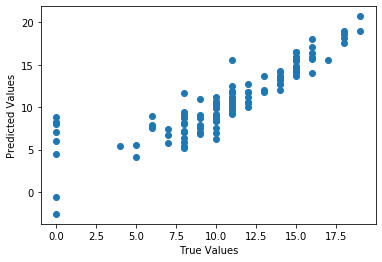

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

y = df.Final_Grade                                                               # predicting final grade
x = df.drop('Final_Grade',axis=1)                                   
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,shuffle=True)  # splitting data 70/30 for train/test
lm = linear_model.LinearRegression()                                             # linear regression model
model = lm.fit(x_train, y_train)
predictions = model.predict(x_test)
plt.scatter(y_test,predictions)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
print("Score:", model.score(x_test,y_test))

Score: 0.2773109243697479


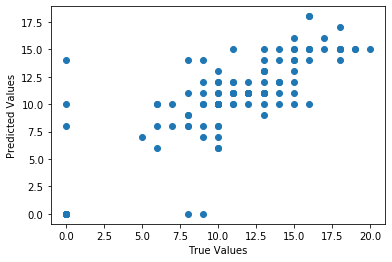

In [0]:
from sklearn.linear_model import LogisticRegression

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,shuffle=True)
logreg = linear_model.LogisticRegression(solver='liblinear')                      #logistic regression model
logreg.fit(x_train, y_train)
predictions = logreg.predict(x_test)
plt.scatter(y_test,predictions)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
print("Score:", logreg.score(x_test, y_test))